In [20]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np


In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import neighbors
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.naive_bayes import GaussianNB
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier

In [22]:
df= pd.read_csv('forestfires.csv')

In [23]:
def condition(row):
    if row['area'] >=0 and row['area']<2 :
        return 0
    elif row['area'] >=2 and row['area']<10 :
        return 1
    else:
        return 2

In [24]:
df['category'] =df.apply(condition, axis=1)
#df.to_csv('new_forestfire.csv',index=False)


In [25]:
#ndf=pd.read_csv('new_forestfire.csv')


In [26]:
def month_cat(month):
    if month == 'oct' or month == 'sep' :
        return 0
    elif month =='nov' or month == 'may':
        return 1
    elif month == 'mar' or month == 'jun':
        return 2
    elif month == 'jul' or month == 'jan':
        return 3
    elif month == 'feb' or month == 'dec':
        return 4
    else : 
        return 5


In [27]:
df['month_new'] = df['month'].apply(month_cat)

In [28]:
x= df[['temp','RH','wind','rain','month_new']]
y= df[['category']]

In [55]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.25,random_state=13)


In [56]:
seed=7

In [57]:
scoring = 'accuracy'


In [58]:
def svm():
    classifier=SVC(kernel="linear")
    classifier.fit(x_train,y_train)
    y_pred= classifier.predict(x_test)
    #kfold = model_selection.KFold(n_splits=10, random_state=seed)
    #y_pred = model_selection.cross_val_score(classifier, x_train, y_train, cv=kfold, scoring=scoring)
    score=accuracy_score(y_test,y_pred)
    print("\nSupport Vector Machine\nAccuracy Score: ",+score)
    #plt.scatter(y_test,y_pred)
    #plt.xlabel('True Values ')
    #plt.ylabel('Predictions ')
    #plt.show()
    return score    

In [59]:
def random():
    model = RandomForestClassifier(n_estimators=50)
    model1= BaggingClassifier(base_estimator=model, n_estimators=70, random_state=41)
    results_model = model1.fit(x_train,y_train)
    y_pred1= results_model.predict(x_test)
    score=accuracy_score(y_test,y_pred1)
    print("\nRandom Forest\nAccuracy Score: ",+score)
    
    return score    

In [60]:
def kmean():
    km = KMeans(n_clusters=3)
    km.fit(x_train,y_train)
    y_pred= km.predict(x_test)
    #kfold = model_selection.KFold(n_splits=10, random_state=seed)
    #y_pred = model_selection.cross_val_score(km, x_train, y_train, cv=kfold, scoring=scoring)
    score=accuracy_score(y_test,y_pred)
    print("\nK_Means\nAccuracy Score: ",+score)
    
    return score    

In [61]:
def knn():
    model= KNeighborsClassifier()
    model.fit(x_train,y_train)
    y_pred= model.predict(x_test)
    score=accuracy_score(y_test,y_pred)
    print("\nKNeighbour\nAccuracy Score: ",+score)
    
    return score    

In [62]:
models=[kmean,random,svm,knn]

In [63]:
names=['kmean','random','svm','knn']



In [64]:
name=[]
results=[]
m=0
for model in models:
    print("\n")
    r=models[m]()
    results.append(r)
    name.append(m)
    
    print('\n')
    
    m=m+1
    
   
    
    




K_Means
Accuracy Score:  0.4






C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)



Random Forest
Accuracy Score:  0.5230769230769231






C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)



Support Vector Machine
Accuracy Score:  0.5923076923076923





KNeighbour
Accuracy Score:  0.5230769230769231




<ipython-input-61-face8793628e>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model.fit(x_train,y_train)


<BarContainer object of 4 artists>

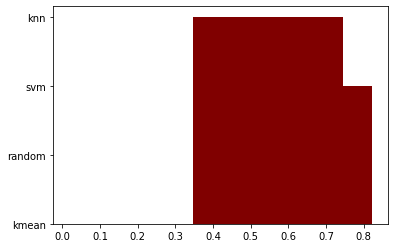

In [162]:
#results
#names
plt.bar(results, names, color ='maroon',
        width = 0.4)

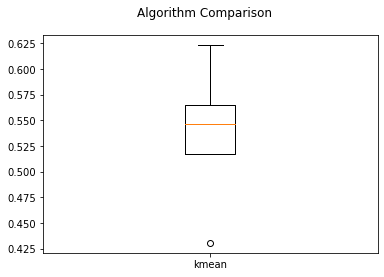

In [131]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [101]:
y=svm()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for examp

ValueError: Found input variables with inconsistent numbers of samples: [130, 10]